1-import libraries
2-read file
--Preprocessing
3-remove unnecessary columns
4-remove NaN values
5-encode textual values
5- vizulize


In [1]:
#importing importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
#importing csv file
df=pd.read_csv(r"C:\Users\lenovo\Desktop\coursera\Data-Collisions.csv")
df.head()

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


<H3>PREPROCIESSING</H3>


In [17]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [18]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [19]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [20]:
df2=df.copy()
drop_columns=['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO','STATUS',"INTKEY","LOCATION",'EXCEPTRSNCODE',
       'EXCEPTRSNDESC',"INATTENTIONIND","PEDROWNOTGRNT","SPEEDING",'SEVERITYCODE.1','SEVERITYDESC','INCDATE','INCDTTM', 'JUNCTIONTYPE','SDOT_COLCODE', 'SDOT_COLDESC','SDOTCOLNUM','SEGLANEKEY', 'CROSSWALKKEY']
df2.drop(drop_columns,axis=1,inplace=True)

In [21]:
df2.shape

(194673, 14)

AttributeError: module 'matplotlib.pyplot' has no attribute 'figsize'

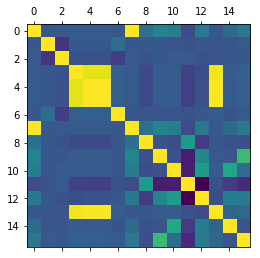

In [63]:
plt.matshow(df.corr())
plt.figsize(20,20)
plt.show()

In [22]:
df2.dropna(inplace=True)
print(df2.shape)
df2.isnull().sum()

(187504, 14)


SEVERITYCODE     0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
ST_COLCODE       0
ST_COLDESC       0
HITPARKEDCAR     0
dtype: int64

In [23]:
df2.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,N,Overcast,Wet,Daylight,10,Entering at angle,N
1,1,Block,Sideswipe,2,0,0,2,0,Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,N
2,1,Block,Parked Car,4,0,0,3,0,Overcast,Dry,Daylight,32,One parked--one moving,N
3,1,Block,Other,3,0,0,3,N,Clear,Dry,Daylight,23,From same direction - all others,N
4,2,Intersection,Angles,2,0,0,2,0,Raining,Wet,Daylight,10,Entering at angle,N


In [24]:
df2["UNDERINFL"]=df2["UNDERINFL"].apply(lambda x:0 if x in ['N', '0'] else 1)


In [25]:
a=df2["WEATHER"].value_counts()
weather_less_600=a[a<600]
weather_less_600

Fog/Smog/Smoke              563
Sleet/Hail/Freezing Rain    112
Blowing Sand/Dirt            49
Severe Crosswind             25
Partly Cloudy                 5
Name: WEATHER, dtype: int64

In [26]:
df2["WEATHER"]=df2["WEATHER"].apply(lambda x:"Other" if x in weather_less_600 else x)
we_enc=LabelEncoder()
df2["WEATHER"]=we_enc.fit_transform(df2["WEATHER"])
df2["WEATHER"].unique()


array([2, 3, 0, 5, 1, 4], dtype=int64)

In [27]:
df2.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,0,2,Wet,Daylight,10,Entering at angle,N
1,1,Block,Sideswipe,2,0,0,2,0,3,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,N
2,1,Block,Parked Car,4,0,0,3,0,2,Dry,Daylight,32,One parked--one moving,N
3,1,Block,Other,3,0,0,3,0,0,Dry,Daylight,23,From same direction - all others,N
4,2,Intersection,Angles,2,0,0,2,0,3,Wet,Daylight,10,Entering at angle,N


In [28]:
df2.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,0,2,Wet,Daylight,10,Entering at angle,N
1,1,Block,Sideswipe,2,0,0,2,0,3,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,N
2,1,Block,Parked Car,4,0,0,3,0,2,Dry,Daylight,32,One parked--one moving,N
3,1,Block,Other,3,0,0,3,0,0,Dry,Daylight,23,From same direction - all others,N
4,2,Intersection,Angles,2,0,0,2,0,3,Wet,Daylight,10,Entering at angle,N


In [29]:
c=df2.ST_COLDESC.value_counts()
cd=c[c<250]
df2.ST_COLDESC=df2.ST_COLDESC.apply(lambda x:"other" if x in cd else x)

In [30]:
df2.drop(["ST_COLCODE"],axis=1,inplace=True)


In [31]:
df2.SEVERITYCODE=df2.SEVERITYCODE.apply(lambda x:x-1)

In [33]:

en1=LabelEncoder()
en2=LabelEncoder()
en3=LabelEncoder()
en4=LabelEncoder()
en5=LabelEncoder()
en6=LabelEncoder()
df2["ADDRTYPE"]=en1.fit_transform(df2["ADDRTYPE"])
df2.ROADCOND=en2.fit_transform(df2.ROADCOND)
df2.COLLISIONTYPE=en3.fit_transform(df2.COLLISIONTYPE)
df2.LIGHTCOND=en4.fit_transform(df2.LIGHTCOND)
df2.ST_COLDESC=en5.fit_transform(df2.ST_COLDESC)
df2.HITPARKEDCAR=en6.fit_transform(df2.HITPARKEDCAR)

In [34]:
df2.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLDESC,HITPARKEDCAR
0,1,2,0,2,0,0,2,0,2,8,5,0,0
1,0,1,9,2,0,0,2,0,3,8,2,9,0
2,0,1,5,4,0,0,3,0,2,0,5,18,0
3,0,1,4,3,0,0,3,0,0,0,5,7,0
4,1,2,0,2,0,0,2,0,3,8,5,0,0


In [35]:
X=np.asarray(df2.iloc[:,1:])
Y=np.asarray(df2.SEVERITYCODE)
Y

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

<H3>DATA NORMALIZATION</H3>

In [36]:
ss=StandardScaler()
X=ss.fit_transform(X)


In [38]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (150003, 12) (150003,)
Test set: (37501, 12) (37501,)


<H4>LOGISTIC REGRESSION<H4>

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
lr_pred= LR.predict(X_test)


<H4>K-Nearest Neighbours</H4>

In [41]:
from sklearn.neighbors import KNeighborsClassifier
kNN_model = KNeighborsClassifier(n_neighbors=4).fit(X_train,y_train)

In [42]:
knn_pred=kNN_model.predict(X_test)

<h4>decision Tree<h4>

In [43]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
dt_pred=model_dt.predict(X_test)

<h4>svm</h4>

<h3>accuraccy calulation</h3>

In [45]:
#importing important libraries
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [52]:
#accuracy score
print("logistic accuracy:",(accuracy_score(y_test,lr_pred)))
print("KNN accuracy:",(accuracy_score(y_test,knn_pred)))
print("logistic accuracy:",(accuracy_score(y_test,dt_pred)))

logistic accuracy: 0.7536599024026026
KNN accuracy: 0.7439001626623291
logistic accuracy: 0.7568864830271193


In [58]:
print("logistic accuracy:",(f1_score(y_test,lr_pred,average='weighted')))
print("KNN accuracy:",(f1_score(y_test,knn_pred,average='weighted')))
print("logistic accuracy:",(f1_score(y_test,dt_pred,average='weighted')))

logistic accuracy: 0.7091014538448005
KNN accuracy: 0.7157642040930381
logistic accuracy: 0.7184306628284571
